# Lyhyt johdanto data-analytiikkaan pythonilla

In [1]:
1+1

2

In [2]:
muuttuja1 = 5
muuttuja2 = 4

In [3]:
muuttuja1 + muuttuja2

9

## Tutustutaan pandas-kirjastoon

Tuodaan pandas-kirjasto:

In [4]:
import pandas as pd

Tuodaan Excel-tiedosto dataframe-objektina:

In [6]:
titanic = pd.read_excel(r"C:\Users\h02281\OneDrive - Haaga-Helia Oy Ab\Desktop\titanic.xlsx")

In [9]:
titanic.head(6)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"


Luodaan dataframe-objekti tuomatta aineitoa muualta:

In [10]:
sanakirja1 = {'nimi': ['Alice','Bob','Carol'], 'ikä': [34,42,51]}
sanakirja1

{'nimi': ['Alice', 'Bob', 'Carol'], 'ikä': [34, 42, 51]}

In [11]:
df1 = pd.DataFrame(sanakirja1)
df1

,nimi,ikä
0,Alice,34
1,Bob,42
2,Carol,51


Luodaan pari dataframea lisää ja yhdistellään niitä:

In [12]:
df2 = pd.DataFrame({'nimi': ['Dave','Eva'], 'ikä': [21,47]})
df3 = pd.DataFrame({'kotikunta': ['Vantaa','Espoo','Helsinki']})

In [13]:
df2

,nimi,ikä
0,Dave,21
1,Eva,47


In [14]:
df3

,kotikunta
0,Vantaa
1,Espoo
2,Helsinki


In [19]:
df4 = pd.concat([df1,df3],axis=1)
df4

,nimi,ikä,kotikunta
0,Alice,34,Vantaa
1,Bob,42,Espoo
2,Carol,51,Helsinki


In [20]:
pd.concat([df1,df2],axis=0,ignore_index=True)

,nimi,ikä
0,Alice,34
1,Bob,42
2,Carol,51
3,Dave,21
4,Eva,47


## Lasketaan tunnuslukuja

In [21]:
titanic['age'].describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

In [22]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


## Ristiintaulukoidaan muuttujia

In [29]:
pd.crosstab(titanic['survived'],titanic['pclass'],margins=True,normalize='columns').round(2)

pclass,1,2,3,All
survived,,,,
0,0.38,0.57,0.74,0.62
1,0.62,0.43,0.26,0.38


Frekvenssitaulukko:

In [30]:
pd.crosstab(titanic['pclass'],'f')

col_0,f
pclass,
1,323
2,277
3,709


## Suodatetaan aineistoa

In [31]:
1==2

False

In [32]:
3==3

True

In [33]:
4>3

True

In [34]:
4<3

False

In [35]:
titanic['age']>25

0        True
1       False
2       False
3        True
4       False
        ...  
1304    False
1305    False
1306     True
1307     True
1308     True
Name: age, Length: 1309, dtype: bool

Suodatetaan ne matkustajat, jotka ovat yli 25-vuotiaita:

In [36]:
titanic[titanic['age']>25]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,3,0,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,C,NaN,NaN
1301,3,0,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


Suodatetaan ne matkustajat, jotka ovat yli 25-vuotiaita ja matkustivat 2. luokassa:

In [37]:
titanic[(titanic['age']>25)&(titanic['pclass']==2)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
323,2,0,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.00,NaN,C,NaN,NaN,"Russia New York, NY"
324,2,1,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.00,NaN,C,10,NaN,"Russia New York, NY"
325,2,0,"Aldworth, Mr. Charles Augustus",male,30.0,0,0,248744,13.00,NaN,S,NaN,NaN,"Bryn Mawr, PA, USA"
328,2,0,"Angle, Mr. William A",male,34.0,1,0,226875,26.00,NaN,S,NaN,NaN,"Warwick, England"
329,2,1,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.00,NaN,S,11,NaN,"Warwick, England"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,2,0,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.75,NaN,S,NaN,NaN,"Bournmouth, England"
593,2,1,"West, Mrs. Edwy Arthur (Ada Mary Worth)",female,33.0,1,2,C.A. 34651,27.75,NaN,S,10,NaN,"Bournmouth, England"
594,2,0,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.50,NaN,S,NaN,NaN,"Guernsey, England / Edgewood, RI"
596,2,1,"Wilhelms, Mr. Charles",male,31.0,0,0,244270,13.00,NaN,S,9,NaN,"London, England"


## Luodaan muutama kaavio

Tuodaan grafiikkaa varten sopiva kirjasto:

In [38]:
import matplotlib.pyplot as plt

Luodaan hajontakuvio:

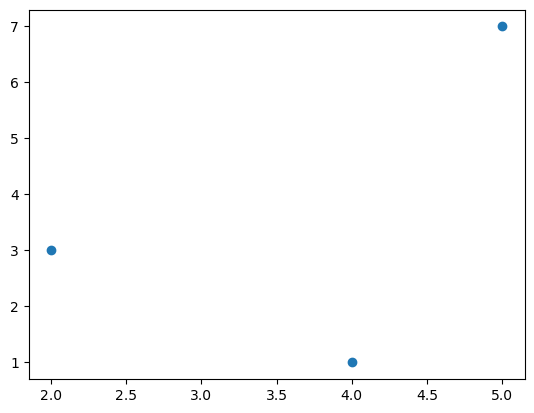

In [39]:
plt.scatter([2,5,4],[3,7,1])

Text(0.5, 1.0, 'Iän ja lipun hinnan yhteys')

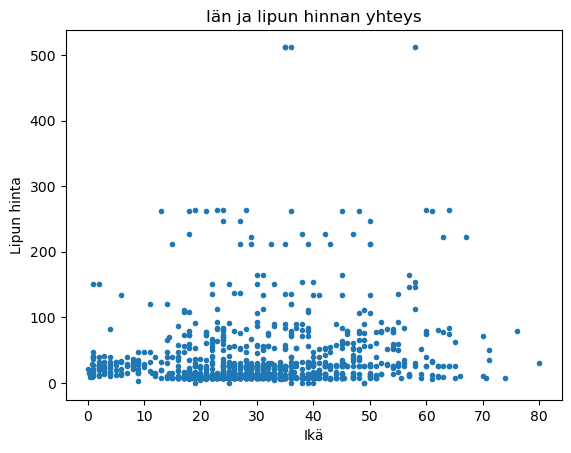

In [44]:
plt.scatter(titanic['age'],titanic['fare'],marker='.')
plt.xlabel('Ikä')
plt.ylabel('Lipun hinta')
plt.title('Iän ja lipun hinnan yhteys')

Luodaan histogrammi:

(array([ 72.,  62., 274., 250., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.1667 ,  8.15003, 16.13336, 24.11669, 32.10002, 40.08335,
        48.06668, 56.05001, 64.03334, 72.01667, 80.     ]),
 <BarContainer object of 10 artists>)

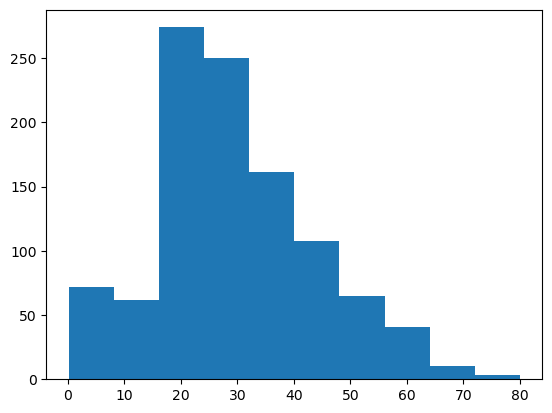

In [46]:
plt.hist(titanic['age'])